# Deep Learning Medical Image Classification & Analysis using Keras for binary-class classification task

# Library & Data Import



## Import Libraries

Import and load necessary python packages to the instance. 

In [ ]:
# Built-in Imports 
# Random module loaded to perform random operations like generating randon numbers, shuffling a list, etc

import random

In [ ]:
# Importing Required Python Libraries
# Import 'Numpy' for Numerical Operations in Python
# Import 'Pandas' for Data Operations & Analysis
# Import 'MatPlotLib' for Visualisation requirements 
# Import necessary functions from 'SkLearn.Metrics' for evaluate the performance of machine learning models 
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Importing Required Libraries from Keras API of TensorFlow
# Import 'Layers' & 'Regularizers' module to build and train convolutional, dense layers for neural networks
# Import 'Model' and 'Sequential' classes to define, build and train - image and complex layers classifications
# Import 'SGD' (Stochastic Gradient Descent) optimisers classes for CNN Model training
# Import 'RMSProp' (Root Mean Square Propagation) optimisers classes for Dense Model training
# Import 'Adam' optimisers classes for Regularization Model training
# Import 'L1','L2','L1_L2' regularization function for neural network training
# Import 'get_file' utility function to download a file from the path and save locally
# Import 'to_categorical' utility function to convert class labels to one-hot encoded vectors 
# Import 'ImageDataGenerator' class for generating batch wise image data for neural network training
# Import 'Early Stop' callback function for Regularization Model

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam 
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

## Download Dataset

Selecting a specific data set from the MedMNIST Repository and importing the details of that specific dataset as a NumPy array object to a Google Colab instance. Then Download & Store the dataset files from the specified URL in the info file. 

* Select and set the name of dataset to processed to **PneumoniaMNIST**, a binary-class classification task data set.
* Using the **wget** function, download the python file **info.py** from the **MedMNIST** GitHub repository. 
* Import the information ( **INFO** ) regarding the specific data set - **PneumoniaMNIST** from the **MedMNIST** dictionary which contains data about different medical images.

In [ ]:
# Set the name of dataset with the medical image as PathMNIST
DATA_NAME = "PneumoniaMNIST"

# Download the data file MedMNIST 
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py

# Load info from MedMNIST dictionary revelent to PathMNIST dataset 
from info import INFO
data = INFO[DATA_NAME.lower()]

--2023-04-10 20:03:26--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22841 (22K) [text/plain]
Saving to: ‘info.py.2’

info.py.2           100%[===================>]  22.31K  --.-KB/s    in 0s      

2023-04-10 20:03:26 (108 MB/s) - ‘info.py.2’ saved [22841/22841]



*   Downloads the **PneumoniaMNIST** dataset files from the URL specified in the **info.py** and saves that to **dataset.npz** using the **get_file** function

In [ ]:
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz", 
                     origin=data["url"], 
                     md5_hash=data["MD5"])

* Load the **PneumoniaMNIST** dataset files to a numpy object - **dataset**. 
* **Training**, **Validation**, and **testing** data i.e., images with corresponding labels are extracted and stored to :    
 * Training Images - **train_x**, Training Labels - **train_y**
 * Validation Images - **val_x**, Validation Lables - **val_y**
 * Testing Images - **test_x**, Test Labels - **test_y**

* The keys used to access the images and label for train, val, test is already used in the **info.py** file. (eg: train_images, train_labels, etc) 

In [ ]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

## Data Exploration

Examine and Generate a random image from the dataset. 





The medical image of the **PneumoniaMNIST** data set is examined to make sure it is suitable to use in a machine learning algorithm. 

* List of labels has been declared as '**labels**'. 

* Categories in the dataset and the total number of images are included in that list. Then, the number of images assigned to each category in each of the training/validation/testing datasets is calculated. 

* Then the result is printed in table format.

By examining the table results, we can identify how evenly the images are distributed and any irregularities that may affect the machine learning model's performance. 

In [ ]:
# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]), 
                            np.append(val_counts, [sum(val_counts)]), 
                            np.append(test_counts, [sum(test_counts)]))), 
                   index=labels, columns=["Train", "Val", "Test"]))

           Train  Val  Test
normal      1214  135   234
pneumonia   3494  389   390
total       4708  524   624


* Display a random generated image with its label from the training data set of **PneumoniaMNIST**
(The Actual image is in grey scale, but using the colormap feature in matlab the image is visualised in color based on the intensity of the greyscale.)  

1553: pneumonia


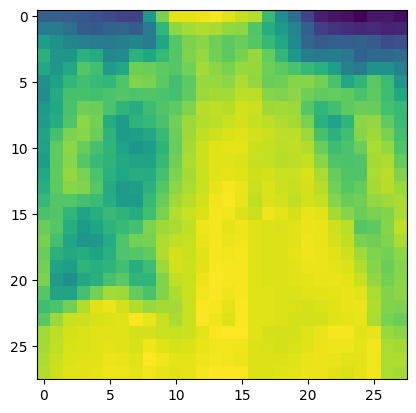

In [ ]:
# Displays a random image from training dataset.
index = random.randint(0, len(train_x))
print(f"{index}: {labels[train_y[index][0]]}")
plt.imshow(train_x[random.randint(0, len(train_x))])

## Data Processing 

Image Augmentation & Conversion to a single array to check the variations and improve results

* Image augmentation with centralization, standard normalization, and flip features. 

In [ ]:
# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

* Reshape the input data into 4 dimensional array. 

The PneumoniaMNIST Ultrasound Images are the grayscale flattened images which are in 2-Dimensional array with sampling number and width * height. So reshaping to 4-Demensional array is required to input the data to a CNN network in the form of a Sampling Number, width, height, Color Channel Number. 

In [ ]:
#Reshape the input data to have 4 dimensional array
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1) 

* Use the image data generator to fit and combine the training and validation image data into a single array.

In [ ]:
# Fit the data generator to the training set.
data_generator.fit(train_x)

# Using different Models Used to Define, Train, and Analyse the Learning Curves

A. Convolutional Neural Network (CNN) Model
<br>
B. Dense Neural Network Model without convolutional layer
<br>
C. Deep Neural Network with Regularization Techniques

# A. Convolutional neural network model 

> Convolutional Neural Networks (CNN) is a type of neural network that use the mathematical operation called convolution instead of general matrix multiplication in at least one of their layers. 
<br><br>
> This convolutional layer consists of three stages : 
<br>
1. <b>Convolution Stage</b> : Perform several convolutions in parallel to produce a set of linear activations.
<br>
2. <b>Detector Stage</b> : Each linear activation runs through a nonlinear activation function ( i.e; rectified linear activation function )
<br>
3. <b>Pooling Stage</b> : Pooling function is used to modify the output of layers with a summary statistic of nearby outputs.
* **SGD optimiser** is used here to Model training on the CNN Model because of it's Simplicity and Efficiency. 
<br><br>
The CNN Model's Working Concept is to **Fragment** Images into receptive fields & Analyse those in **separate** convolutional layers.
<br><br>
Reference : Chapter 9 (Convolutional Networks) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 




The Evaluation and Analyse of Medical images using the Convolutional Neural Network (CNN) Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

### Model Definition

* The CNN Model consists of **one input layer, two convolutional layers with max pooling, one flatten layer and an output layer**.
<br><br>
* Both **Convolutional Layers** have 32 Filters and a 3x3 Kernel Size use **ReLU Activation Function** (Rectified Linear Unit Activation Function) to the inputs. 
* Both **Max Pooling layers** reduce the dimension of the output layer of each convolutional layer to the Pool Size of 2x2.
<br><br>
* The **Input layer** takes the **Image** as the **Input**
* **Input Layer Output** as **1st Convolutional Layer Input**  
* **1st Convolutional Layer Output** to **1st Pooling Layer Input**
* **1st Pooling Layer Output** to **2nd Convolutional Layer Input** 
* **2nd Convolutional Layer Output** to **2nd Pooling Layer Input**
* **2nd Pooling Layer Output** to **Flatten Input** 
<br><br>
* The **Flatten Layer Input** is converted to a one dimensional array. 
* Then **Flatten layer Output** is passed to fully connected output later with a **sigmoid function** since it's a binary class task.
<br><br> 
* Then the model is initiated as **CNNModel** and the summary of the model with structure and number of parameters in each layer is printed.

In [ ]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Defines the output layer of the model with single node in sigmoid activation function.
output = layers.Dense(units=1, activation="sigmoid")(flatten)

# Initilises the defined model and prints summary of the model.
cnn_model = Model(inputs=input, outputs=output, name="CNN_Model")
cnn_model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 800)               0 

### Model Training

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number of samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

A Smaller Batch size is used to get more data over a single iteration. 

In [ ]:
# Defines the parameters used during training.
BATCH_SIZE = 10
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compile the model. 
* SGD Optimizer is used in CNN Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  The **binary_crossentropy** loss function is used here since it's a binary-class classification task. 

In [ ]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = SGD(learning_rate=LEARNING_RATE)
cnn_model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluates validation data over each epoch of training in order to monitor the performance of model. 

* **Fit** method trains the model on the generated data for a define number of epochs. 

* Here without using the **to_categorical** function, Each Label name can be represented by a binary vector of 0's & 1's since its a binary function.

* **Training data** is generated by **data_generator.flow** methods from **training data** and **binary data labels** in defined **batches**. 

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by the **data_generator.flow** method from **Validation data** and it's **binary data label** in a defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* The **epochs** parameter is set the define **NUM_EPOCHS**

* The **cnn_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 

In [ ]:
# Passing the Training & Validation data to the model
cnn_history = cnn_model.fit(data_generator.flow(train_x, train_y, batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, val_y, batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
470/470 [==============================] - 3s 6ms/step - loss: 0.6145 - accuracy: 0.7245 - val_loss: 0.5763 - val_accuracy: 0.7424
Epoch 2/10
470/470 [==============================] - 2s 5ms/step - loss: 0.5396 - accuracy: 0.7421 - val_loss: 0.5123 - val_accuracy: 0.7443
Epoch 3/10
470/470 [==============================] - 2s 5ms/step - loss: 0.4759 - accuracy: 0.7681 - val_loss: 0.4562 - val_accuracy: 0.8130
Epoch 4/10
470/470 [==============================] - 2s 5ms/step - loss: 0.4183 - accuracy: 0.8331 - val_loss: 0.4021 - val_accuracy: 0.8416
Epoch 5/10
470/470 [==============================] - 2s 5ms/step - loss: 0.3659 - accuracy: 0.8709 - val_loss: 0.3539 - val_accuracy: 0.8855
Epoch 6/10
470/470 [==============================] - 3s 6ms/step - loss: 0.3196 - accuracy: 0.8946 - val_loss: 0.3120 - val_accuracy: 0.8855
Epoch 7/10
470/470 [==============================] - 2s 5ms/step - loss: 0.2796 - accuracy: 0.9104 - val_loss: 0.2794 - val_accuracy: 0.9160
Epoch 

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of the test dataset that is passed to the **test data** and **its binary data labels** under the parameter of batch size.
* Then in the evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [ ]:
# Evaluate the test accuracy
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(data_generator.flow(test_x, test_y, batch_size=BATCH_SIZE))
print('\n Test accuracy:', cnn_test_acc)
print('\n Test loss :', cnn_test_loss)

63/63 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8349

 Test accuracy: 0.8349359035491943

 Test loss : 0.4092862010002136


### Learning Curve Analysis###

Plot CNN Model Accuracy 

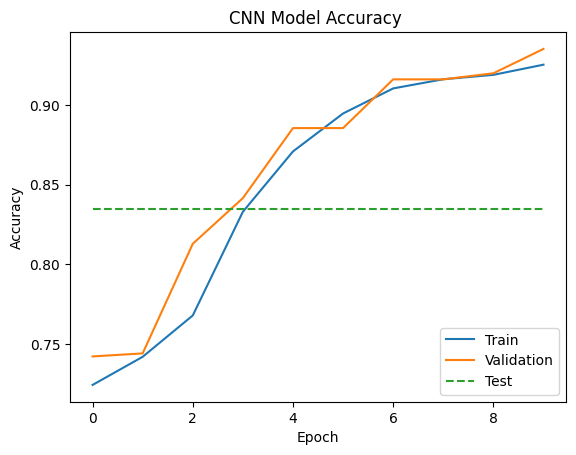

In [ ]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('CNN Model Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of CNN Model Accuracy** 

* Training Accuracy - 93%
* Validation Accuracy - 94%
* Test Accuracy - 84%

The Training Accuracy and Validation accuracy are improving with each epochs. The **Training accuracy** is rising from 72.45% to 92.52% and the **Validation accuracy** is rising from 74.24% to 93.51%. This trend indicate that the model is learning well from the new data. But in some points the validation accuracy is higher than the training accuracy which indicates overfitting in somecase. Also the model is achieving around **83.5% test accuracy** which can ensure its efficiency. 

Plot CNN Model Loss 

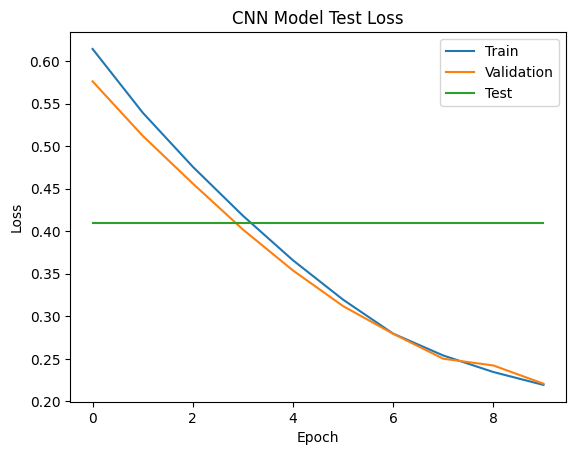

In [ ]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('CNN Model Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of CNN Model Loss** 

* Training Loss - 0.21
* Validation Loss - 0.22
* Test Loss - 0.41 

From the CNN Model Loss graph we can see that the model is improving the to decrease loss rate over each epoch during the **training & validation** and has almost achieved a desired loss rate equivalent to 0.22 and a **test loss rate of 0.41** which is an indication that the model is performing well.   

Plot CNN Model Performance

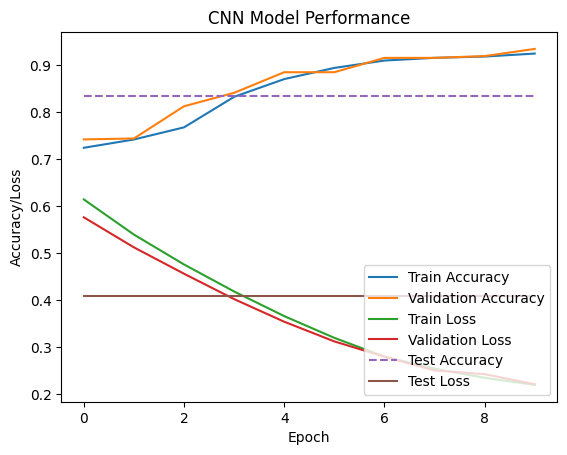

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('CNN Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='lower right')
plt.show()


**Analysis of CNN Model Performance** 

* Training Accuracy - 93%
* Validation Accuracy - 94%
* Test Accuracy - 84%
<br><br>
* Training Loss - 0.21
* Validation Loss - 0.22
* Test Loss - 0.41 

The overall model is performing well with a **test accuracy of 84%** and a test loss of **0.41**. During the model training the loss and accuracy is improved over each epoch but stopped that steady improvement near the 6 &  7 epochs. 

**Improvements Required :** Need to do  image augmentation and regularization methods to improve the model's performance.  

# B. Dense Network Model

> Dense Neural Network Model is a type of feed forward neural network that consists of multiple fully connected dense layers. 
* The input layers consist of flattened image pixels and the output layer consists of representations of different blood cell types. 
* There will be multiple fully connected hidden layers between the input and output layers. These layers are connected to the previous layers and have been assigned weight. 
* The output layer is calculated by applying an activation function like **ReLU function** (which is used to learn more complex patterns in the data) and **Softmax function** ( which is used to output a probability distribution over the output classes)
* **RMSprop Optimizer** is used in Dense Neutral Network model since it has an adaptive learning rate optimisation algorithm. 
<br>
<br>
Reference : Chapter 6 (Deep Feedforward Networks) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 

The Dense Neural Network Model Working Concept uses **multiple fully connected layers** of input neurons and activation functions to learn complex patterns. The model is trained with an optimisation algorithm to minimize the loss.   


The Evaluation and Analysis of Medical images using a Dense Neural Network Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

### Model Definition

* The **Dense Model** consist of  **one input layer, a flatten layer, two connected dense layers, and an output layer**.
<br><br>
* The **Flattening Layer** converts the **2D Input** to a **1D Array**.
* The **Dense Layers** with **16** and **8 neurons** will use the **ReLU Activation Function** (Rectified Linear Unit Activation Function) to match the total parameters of the CNN Model.
<br><br>
* **Input Layer** takes the **Image** as **Input**.
* Then the **Input Layer Output** is pass to **Flatten Layer Input**
* The **Flatten Layer Output** is passed to **1st Dense Layer Input**
* The **1st Dense Layer Output** is then passed as input to **2nd dense layer** 
* The **2nd Dense Layer Output** is passed to fully connected output  with a **Sigmoid Function** since its a binary class task. 
<br><br>
* Then the model is initiated as **DenseModel** and the summary of the model is printed, showing the structure and number of parameters in each layer.

In [ ]:
# Define the input layer of the model with the size of an image.
input = Input(shape=train_x[0].shape)

# Flatten the input layer.
flatten = Flatten()(input)

# Define the hidden layers of the model.
dense_1 = Dense(units=16, activation="relu")(flatten)
dense_2 = Dense(units=8, activation="relu")(dense_1)


# Defines the output layer of the model with single node in sigmoid activation function.
output = Dense(units=1, activation="sigmoid")(dense_2)

# Initilises the defined model and prints summary of the model.
dense_model = Model(inputs=input, outputs=output, name="DenseModel")
dense_model.summary()

Model: "DenseModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 16)                12560     
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 dense_90 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


### Model Training

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number of samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

Batch Size is decreased to improve the efficiency of the model since the total size of the data set is comparitively less. 

In [ ]:
# Defines the parameters used during training.
BATCH_SIZE = 10
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compile the model. 

* RMSprop Optimizer is used in Dense Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  **binary_crossentropy** loss function is used here since it's a binary-class classification task. 

In [ ]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = RMSprop(learning_rate=LEARNING_RATE)
dense_model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluates validation data over each epoch of training in order to monitor its performance. 

* **Fit** method trains the model on the generated data for the defined number of epochs. 

* Here without using the **to_categorical** function, Each Label name can be represented by a binary vector of 0's & 1's since it is a binary function.

* **Training data** is generated by **data_generator.flow** methods from **training data** and **binary data label** in defined **batch size**.

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by **data_generator.flow** method from **Validation data** and **binary data label** in defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* **epochs** parameter is set the define **NUM_EPOCHS**

* The **dense_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 

In [ ]:
# Passing the Training & Validation data to the model
dense_history = dense_model.fit(data_generator.flow(train_x, train_y, batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, val_y, batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
470/470 [==============================] - 3s 5ms/step - loss: 0.2159 - accuracy: 0.9123 - val_loss: 0.1785 - val_accuracy: 0.9237
Epoch 2/10
470/470 [==============================] - 2s 4ms/step - loss: 0.1654 - accuracy: 0.9380 - val_loss: 0.1528 - val_accuracy: 0.9466
Epoch 3/10
470/470 [==============================] - 2s 4ms/step - loss: 0.1494 - accuracy: 0.9450 - val_loss: 0.1274 - val_accuracy: 0.9485
Epoch 4/10
470/470 [==============================] - 2s 4ms/step - loss: 0.1398 - accuracy: 0.9473 - val_loss: 0.1491 - val_accuracy: 0.9408
Epoch 5/10
470/470 [==============================] - 3s 6ms/step - loss: 0.1361 - accuracy: 0.9554 - val_loss: 0.1444 - val_accuracy: 0.9370
Epoch 6/10
470/470 [==============================] - 2s 5ms/step - loss: 0.1219 - accuracy: 0.9586 - val_loss: 0.1234 - val_accuracy: 0.9580
Epoch 7/10
470/470 [==============================] - 2s 4ms/step - loss: 0.1268 - accuracy: 0.9550 - val_loss: 0.1257 - val_accuracy: 0.9561
Epoch 

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of test datasets that are passed to **test data** and **binary data label** under the parameter of batch size.
* Then in the evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [ ]:
# Print Test Accuracy & Loss
dense_test_loss, dense_test_acc = dense_model.evaluate(data_generator.flow(test_x, test_y, batch_size=BATCH_SIZE))
print('Test Loss:', dense_test_loss)
print('Test Accuracy:', dense_test_acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.8654
Test Loss: 0.7207392454147339
Test Accuracy: 0.8653846383094788


###Learning Curve Analyse###

Plot Dense Model Accuracy

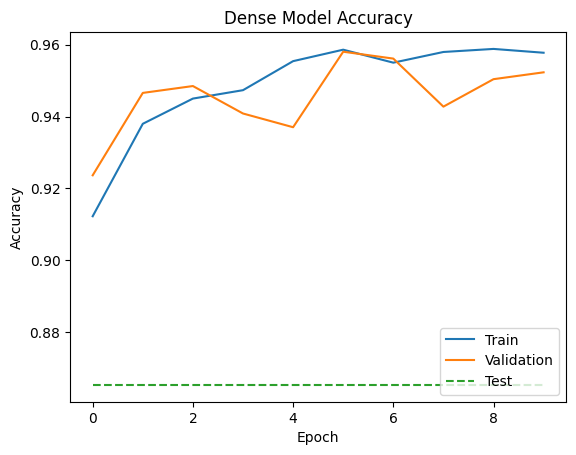

In [ ]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('Dense Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of Dense Model Accuracy** 

* Training Accuracy - 96%
* Validation Accuracy - 95%
* Test Accuracy - 86%

Dense model achieved the highest training & validation accuracy of 95% which is higher than the CNN Model. And the test accuracy of 86.53% is also higher than that of the CNN Model. But from the graph can see some fluctations in the dense model which tends to overfit the training data. 

Plot Dense Model Loss

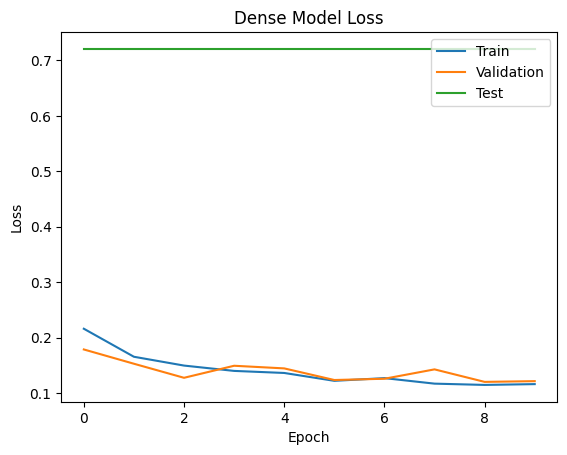

In [ ]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of Dense Model Loss**

* Training Loss - 0.11
* Validation Loss - 0.12
* Test Loss - 0.72

From the graph we can see that the model has a consistent reduction over the loss on both training and validation which indicates the better learning and improvement aspect of the model. But the test loss is around 0.72 which is higher than the training and validation loss which indicates some overfitting in the model. 

Plot Dense Model Performance

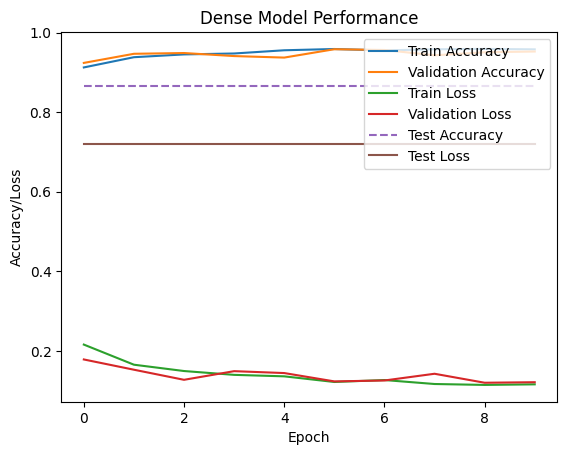

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('Dense Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='upper right')
plt.show()


**Analysis of Dense Model Performance** 

* Training Accuracy - 96%
* Validation Accuracy - 95%
* Test Accuracy - 86%
<br><br>
* Training Loss - 0.11
* Validation Loss - 0.12
* Test Loss - 0.72

Based on Training & Validation loss and accuracy we can state that the model is performing well with decreasing loss and increasing accuracy. But when compared to the test accuracy of 86% and test loss of 0.72 this indicates that the model was subjected to some overfitting. 

**Improvement Needed :** This can be improved by using regularization techniques to reduce overfitting.

# C. Deep Network with Regularization Model 

> Deep Neural Network with Regularization Technique is a type of feed forward neural network that uses multiple layers of neurons and regularization techniques to prevent overfitting of data.  The Model consists of multiple layers of neuron layers including fully connected dense layers, convolutional layers, pooling layers and dropout layers.<br> <br>
The Deep Neural Network with Regularization Technique Model Working Concept uses a combination of multiple convolutional and dense layers with several regularization methods like L1 & L2 Regularizera, Dropout Layers, Data Augmentation and Early Stopping to reduce the overfitting of deep networks.  
* Image Augmentation features are used to improve the performance of the model.
* The input layers consist of the flattened image pixels. 
* There will be a combination of multiple **Convolutional layers** with pooling and fully connected **Dense layers** between the input and output layers. These layers are connected to the previous layers and have been assigned weight.
*  **L1 & L2 Kernal Regularisation** are used in convolutional and dense layers. 
* **Flatten layers** are used to convert the convolutional layer to a one dimensional array
* **Dropout Regularisation layers** are used to prevent overfitting. 
* **ReLU Activation function** is used in Dense and Convolutional Layes to learn more complex patterns in the data.
* **Sigmoid function** used in output of binary class data over the output classes.
* **Adam Optimizer** is used in Dense Neutral Network model since it has an adapative learning rate optimisation algorithm.
* **Early Stop** is used to stop the training if the validation loss is not improving after a set number of epochs. 
<br>
<br>
Reference : Chapter 7 (Regularization for Deep Learning) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 




The Evaluation and Analysis of Medical images using Deep Neural Network with Regularization Technique Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

### Define Model

* The **Deep Neural Network with Regularization Techniques Model** consists of  **one input layer,  Mutliple convolutional layers with max pooling and dense layer, a flatten layer, a dropout layer and an output layer**.
<br><br>
* Both **Convolutional Layers** have 8 & 16 Filters and 3x3 Kernel Size uses the **ReLU Activation Function** (Rectified Linear Unit Activation Function) to match the parameters of convets of CNN Model. 
* Both **Max Pooling layers** reduce the dimension of the output layer of each convolutional layer to the Pool Size of 2x2.
<br><br>
* The **Input layer** takes the **Image** as the **Input**
* **Input Layer Output** as **1st Convolutional Layer Input**  
* **1st Convolutional Layer Output** to **1st Pooling Layer Input**
* **1st Pooling Layer Output** to **2nd Convolutional Layer Input** 
* **2nd Convolutional Layer Output** to **2nd Pooling Layer Input**
* **2nd Pooling Layer Output** to **Flatten Input** 
<br><br>
* The **Flatten Layer Input** is converted to a one dimensional array. 
* The **Flatten Layer Output** is passed to the inputs of Multiple **Dense Layers** & **Dropout Layers**
* The Final **Drop Layer Output** is passed to fully connected output  with a **Sigmoid Function** to produce a better result with less overfitting and a probability distribution of the output. 
<br><br>
* Then the model is initiated as **RegularisedModel** and the summary of the model is printed, with the structure and number of parameters in each layers.

In [ ]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Define an ImageDataGenerator for data augmentation.
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Defines the Multiple convolutional layer with max pooling and regularizer.
conv_1 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Define Multiple Dense layers with dropout and L2 Regularizers
dense_1 = Dense(units=32, activation="relu", kernel_regularizer=l2(0.01))(flatten)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(units=16, activation="relu", kernel_regularizer=l2(0.01))(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)

# Defines the output layer of the model with single node in sigmoid activation function.
output = layers.Dense(units=1, activation="sigmoid")(dropout_2)

# Initilises the defined model and prints summary of the model.
reg_model = Model(inputs=input, outputs=output, name="RegularisedModel")
reg_model.summary()

Model: "RegularisedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 400)          

### Train Model

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number of samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

Batch Size is decreased to improve the efficiency of the model since the total size of the data set is comparitively less. 

In [ ]:
# Defines the parameters used during training.
BATCH_SIZE = 10
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compile the model. 
* **Adam Optimizer** is used in Dense Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  **binary_crossentropy** loss function is used here since it's a binary-class classification task. 

In [ ]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = Adam(learning_rate=LEARNING_RATE)
reg_model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluates validation data over each epoch of training in order to monitor its performance. 

* **Fit** method trains the model on the generated data for a defined number of epochs. 

* **Training data** is generated by **data_generator.flow** methods from **training data** and ** binary data label** with a defined **batch size**.

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by **data_generator.flow** method from **Validation data** and it's ** binary data label** in defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* **epochs** parameter is set the define **NUM_EPOCHS** 

* The **reg_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 

* **EarlyStopping** callback to stop training if the validation loss stops improving.

In [ ]:
# Define an EarlyStopping callback to stop training if the validation loss stops improving.
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Passing the Training & Validation data to the model
reg_history = reg_model.fit(data_generator.flow(train_x, train_y, batch_size=BATCH_SIZE), 
                            steps_per_epoch=len(train_x) / BATCH_SIZE,
                            validation_data=(val_x, val_y),
                            validation_steps=len(val_x) / BATCH_SIZE,
                            epochs=NUM_EPOCHS,
                            callbacks=[early_stop])

Epoch 1/10
470/470 [==============================] - 7s 11ms/step - loss: 1.0468 - accuracy: 0.7130 - val_loss: 0.7575 - val_accuracy: 0.7424
Epoch 2/10
470/470 [==============================] - 4s 9ms/step - loss: 0.7300 - accuracy: 0.7540 - val_loss: 0.6474 - val_accuracy: 0.7405
Epoch 3/10
470/470 [==============================] - 4s 8ms/step - loss: 0.6395 - accuracy: 0.7833 - val_loss: 0.4712 - val_accuracy: 0.8321
Epoch 4/10
470/470 [==============================] - 4s 9ms/step - loss: 0.4991 - accuracy: 0.8275 - val_loss: 0.4254 - val_accuracy: 0.8721
Epoch 5/10
470/470 [==============================] - 4s 9ms/step - loss: 0.4484 - accuracy: 0.8430 - val_loss: 0.4419 - val_accuracy: 0.8130
Epoch 6/10
470/470 [==============================] - 4s 8ms/step - loss: 0.4117 - accuracy: 0.8613 - val_loss: 0.3311 - val_accuracy: 0.8874
Epoch 7/10
470/470 [==============================] - 4s 9ms/step - loss: 0.3810 - accuracy: 0.8636 - val_loss: 0.3351 - val_accuracy: 0.8893
Epoch

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of test datasets that are passed to **test data** and ** binary data label** under the parameter of batch size.
* Then in the evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [ ]:
reg_test_loss, reg_test_acc = reg_model.evaluate(data_generator.flow(test_x, test_y, batch_size=BATCH_SIZE))
print('Test Loss:', reg_test_loss)
print('Test Accuracy:', reg_test_acc)

63/63 [==============================] - 1s 6ms/step - loss: 0.5372 - accuracy: 0.8429
Test Loss: 0.5371813774108887
Test Accuracy: 0.8429487347602844


### Learning Curve Analyse###

Plot Regularized Model Accuracy

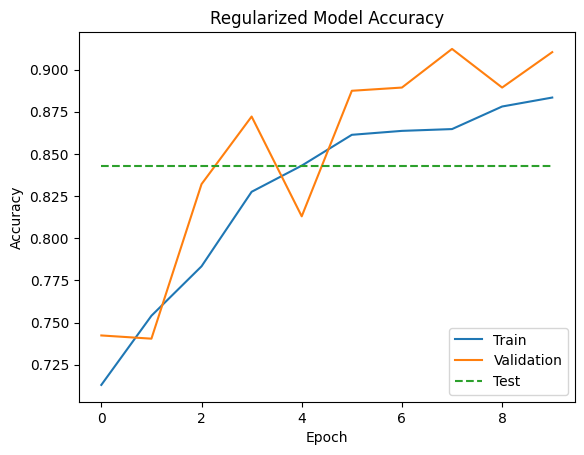

In [ ]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('Regularized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of Regularized Model Accuracy** 

* Training Accuracy - 88%
* Validation Accuracy - 91%
* Test Accuracy - 84%

The Regularisation model is showing a spike and then a uniform sincrease in the training accuracy from 71% to 88% and the validation accuracy is showing a significant improvement from 74% to 91% even though there are variations in between at some points in time. But the test accuracy of 84% indicates there is some overfitting on the training set. All over the model has a comparitively better testing accuracy than the dense model.  

Plot Regularized Model Loss

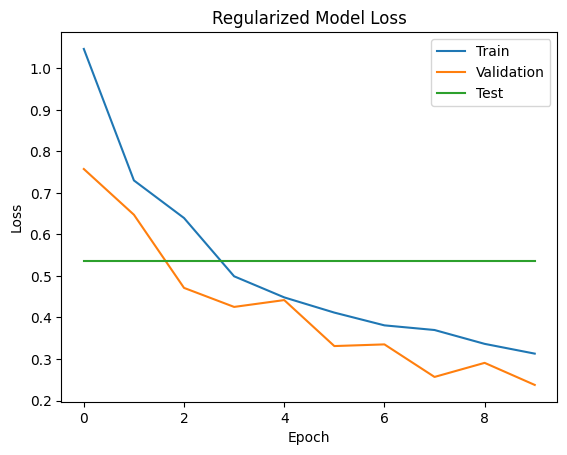

In [ ]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('Regularized Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of Regularized Model Loss** 

* Training Loss - 0.32
* Validation Loss - 0.24
* Test Loss - 0.54

Regularized model has a declining loss over the eproches on training and validation which indicates its improvement on training data. The Training loss initialize at 1.05 and declines to 0.32 at the final epoch, while the validation loss initialized at 0.76 and ends at 0.24. This trend indicates that the model is learning well from new and unseen data. But the loss at testing the model is at 0.54 which is comparably lower than the dense model but higher than the training and validation losses, which confirm the model's better performance on unseen data. 

Plot Regularized Model Performance

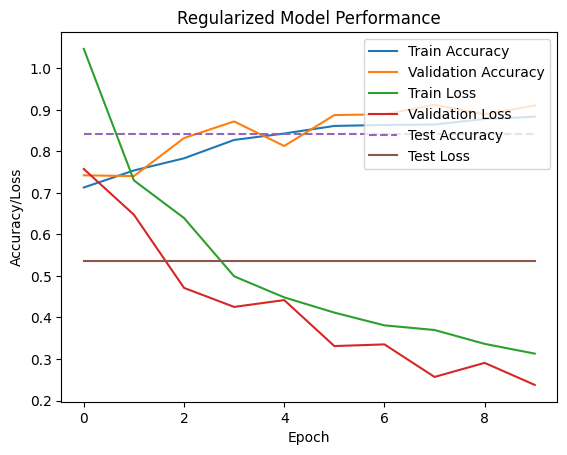

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('Regularized Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='upper right')
plt.show()


**Analysis of Regularized Model Performance** 

* Training Accuracy - 88%
* Validation Accuracy - 91%
* Test Accuracy - 84%
<br><br>
* Training Loss - 0.32
* Validation Loss - 0.24
* Test Loss - 0.54

From the graph we can see the regularised model is performing well with the training and validation sets with increasing accuracy and decreasing loss. The 84% Accuracy and 0.54 Loss at testing also state the viability of the model over the Dense model.

# Analysis of 3 Models

## Accuracy

##Training Accuracy Comparison


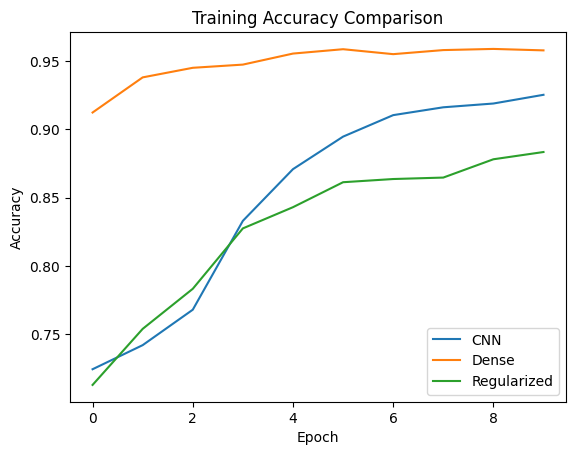

In [ ]:
# Plot training accuracy for all three models on the same graph
plt.plot(cnn_history.history['accuracy'], label='CNN')
plt.plot(dense_history.history['accuracy'], label='Dense')
plt.plot(reg_history.history['accuracy'], label='Regularized')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Training Accuracy of 3 Models** 

The training accuracy for the three models is as follows:

* CNN Model: 92.52%

* Dense Model: 95.77%

* Regularized Model: 88.34%

While comparing the training accuracy graph and data, it's clear that the Dense Model has the highest training accuracy followed by the CNN Model and then the Regularized Model. This suggests that the Dense model has better learning performance. But the higher training accuracy does not imply the model will have better testing accuracy. The model might get overfit to the training to falsify the higher training metrics.

Training Accuracy :    
**Dense Model > CNN Model > Regularized Model**

## Validation Accuracy Comparison ##

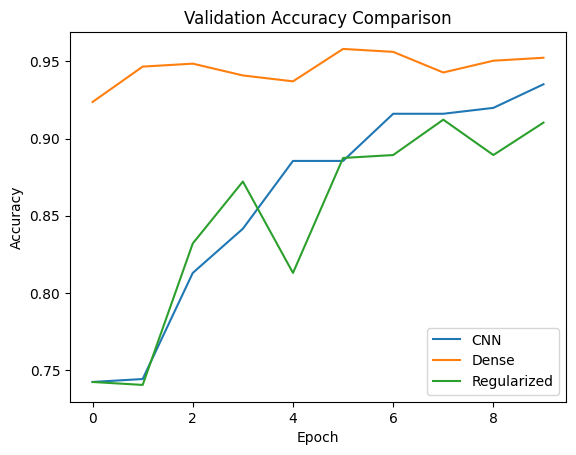

In [ ]:
# Plot Validation accuracy for all three models on the same graph
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(dense_history.history['val_accuracy'], label='Dense')
plt.plot(reg_history.history['val_accuracy'], label='Regularized')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Validation Accuracy of 3 Models** 

The validation accuracy for the three models are is follows:

* CNN Model: 93.51%

* Dense Model: 95.23%

* Regularized Model: 91.03%

While comparing the validation accuracy graph and data, it's clear that the Dense Model has the highest validation accuracy followed by the CNN Model and then the Regularized Model. This suggests that the Dense model is having better validation performance on the unseen data.  

Validation Accuracy :    
**Dense Model > CNN Model > Regularized Model**

##Test Accuracy Comparison

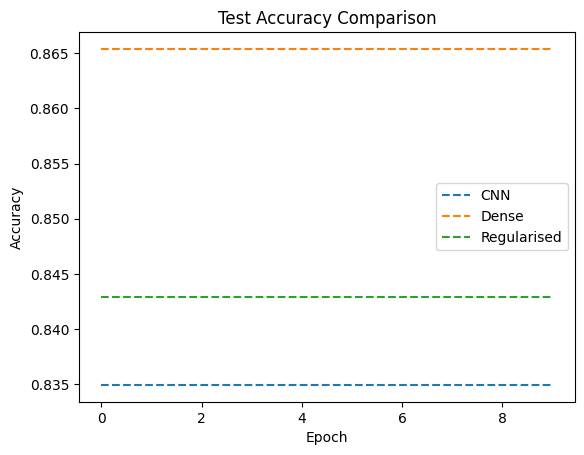

In [ ]:
# Plot Testing accuracy for all three models on the same graph
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--',label='CNN')
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--',label='Dense')
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--',label='Regularised')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Testing Accuracy of 3 Models** 

The Testing  accuracy for the three models are as follows:

* CNN Model: 82.30%

* Dense Model: 86.53%

* Regularized Model: 84.29%

While comparing the testing accuracy graph and data, it's clear that the Dense Model has the highest validation accuracy followed by Regularized Model and then the CNN Model. This suggests that the Dense model is having better test performance on the data. 

Testing Accuracy :    
**Dense Model > Regularized Model > CNN Model**

The Regularized Model has considerable accuracy and decent performance even though it is designed to address overfitting and not maximise accuracy.

## Loss

##Training Loss Comparison##

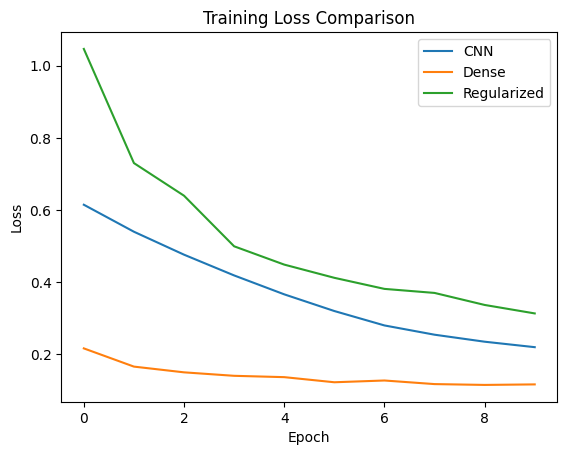

In [ ]:
# Plot training loss for all three models on the same graph
plt.plot(cnn_history.history['loss'], label='CNN')
plt.plot(dense_history.history['loss'], label='Dense')
plt.plot(reg_history.history['loss'], label='Regularized')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Analysis of Training Loss of 3 Models** 

The training Loss for the three models is as follows:

* CNN Model: 0.2193

* Dense Model: 0.1160

* Regularized Model: 0.3129

While comparing the training loss graph and data, it's clear that the Dense Model has the lowest training  loss followed by the CNN Model and then the Regularized Model. But the variations are on the slight side, so can make the inference that the three models are performing well in dealing with training loss.  

Training Loss :    
**Dense Model < CNN Model < Regularized Model**

##Validation Loss Comparison##




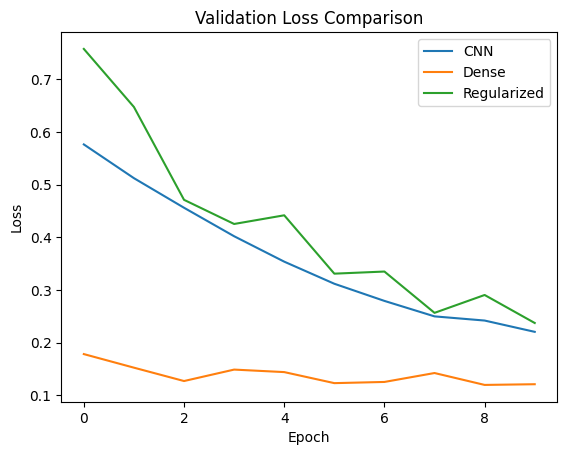

In [ ]:
# Plot Validation Loss for all three models on the same graph
plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.plot(dense_history.history['val_loss'], label='Dense')
plt.plot(reg_history.history['val_loss'], label='Regularized')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Analysis of Validation Loss of 3 Models** 

The Validation Loss for the three models is as follows:

* CNN Model: 0.2207

* Dense Model: 0.1213

* Regularized Model: 0.2375

While comparing the validation loss graph and data, it's clear that the Dense Model has the lowest validation loss followed by the CNN Model and then the Regularized Model. But the variations are on the slight side, so can make the inference that the three models are performing well in generalization and are not overfit to the training data. 

Validation Loss :    
**Dense Model < CNN Model < Regularized Model**

##Test Loss Comparison##

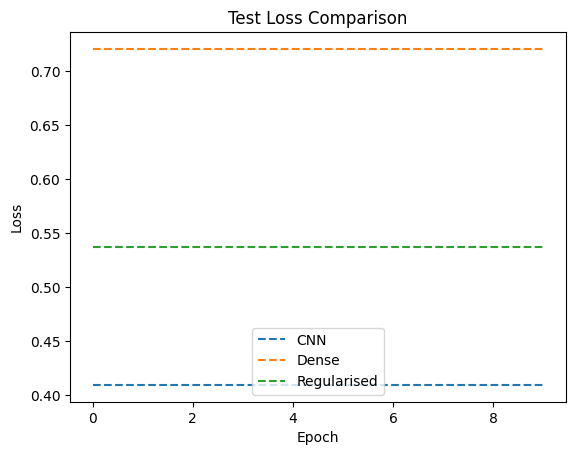

In [ ]:
# Plot Testing Loss for all three models on the same graph
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='--',label='CNN')
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='--',label='Dense')
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='--',label='Regularised')
plt.title('Test Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Analysis of Testing Loss of 3 Models** 

The Testing Loss for the three models is as follows:

* CNN Model: 0.4206

* Dense Model: 0.7207

* Regularized Model: 0.5371

While comparing the testing loss graph and data, it's clear that the CNN Model has the lowest validation loss followed by Regularized Model and the highest for the Dense Model. The lower testing loss defines the model's ability to generalize and predict the new and unknown data accurately.  

Test Loss :    
**CNN Model < Regularized Model < Dense Model**

# Summary Table

In [ ]:
# Select the 10th row of each column to get final value to accuracy and loss in a model
dense_acc_10 = dense_history.history['accuracy'][9]
dense_val_acc_10 = dense_history.history['val_accuracy'][9]
cnn_acc_10 = cnn_history.history['accuracy'][9]
cnn_val_acc_10 = cnn_history.history['val_accuracy'][9]
reg_acc_10 = reg_history.history['accuracy'][9]
reg_val_acc_10 = reg_history.history['val_accuracy'][9]
dense_loss_10 = dense_history.history['loss'][9]
dense_val_loss_10 = dense_history.history['val_loss'][9]
cnn_loss_10 = cnn_history.history['loss'][9]
cnn_val_loss_10 = cnn_history.history['val_loss'][9]
reg_loss_10 = reg_history.history['loss'][9]
reg_val_loss_10 = reg_history.history['val_loss'][9]

# Define the Parameters count 
dense_params = dense_model.count_params()
cnn_params = cnn_model.count_params()
reg_params = reg_model.count_params()


In [ ]:
# Summary table for Overview
summary_table = pd.DataFrame({'CNN': [cnn_params,' ', cnn_acc_10, cnn_val_acc_10, cnn_test_acc, ' ',cnn_loss_10, cnn_val_loss_10, cnn_test_loss],
                              'Dense': [dense_params,' ', dense_acc_10, dense_val_acc_10, dense_test_acc, ' ',dense_loss_10, dense_val_loss_10, dense_test_loss],
                              'Regularised': [reg_params,' ', reg_acc_10, reg_val_acc_10, reg_test_acc, ' ',reg_loss_10, reg_val_loss_10, reg_test_loss]},
                             index=['Total Parameters',' ', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy', ' ','Training Loss', 'Validation Loss', 'Test Loss'])

# Print the summary table
print(summary_table)

                          CNN     Dense Regularised
Total Parameters        10369     12705       14625
                                                   
Training Accuracy    0.925234  0.957732     0.88339
Validation Accuracy  0.935115   0.95229    0.910305
Test Accuracy        0.834936  0.865385    0.842949
                                                   
Training Loss        0.219277  0.115995    0.312907
Validation Loss      0.220732   0.12135    0.237537
Test Loss            0.409286  0.720739    0.537181


# Summary 

### Based on the comparision of training, validation and testing on the metrics of accuracy and loss. 
* The CNN model performs the best overall with the highest testing accuracy and the lowest testing loss among the three models, also has the lowest parameters.  
* The Regularized Model has a good balance between accuracy and loss, and it has methods to reduce the overfit. But the validation and testing accuracies are slightly lower than those of the Dense Model. 
* The Dense Model has the highest testing and training accuracy, but higher training losses suggest the model may have overfitting issues.    

## **CNN Model > Regularised Model > Dense Model** ##

And these models can be used according to the needs and limitations of different applications. 

* If the computational resources are limited - CNN Model, Lower number of parameters. 
* If Accuracy is the only priority, - Dense Model, may have potential overfitting issues.
* For a alance between Accuracy and Resources - Regularized Model. 